In [2]:
# Ejemplo 1
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# datos
#https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv
url = 'https://bit.ly/2COHM14'
data = pd.read_csv(url)
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Preprocesamiento : Escalar los valores de las columnas
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [ ]:
# data_scaled.min(), data_scaled.max()

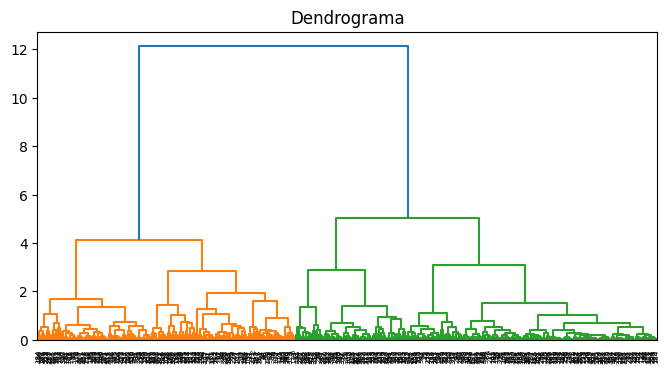

In [5]:
import scipy.cluster.hierarchy as shc
# Dendrograma
plt.figure(figsize=(8,4))
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean',linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

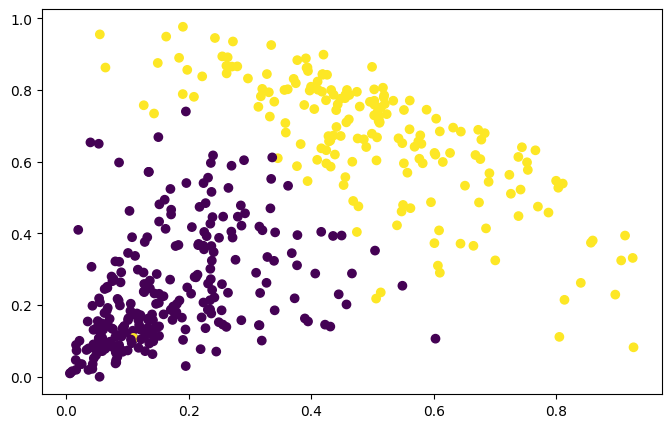

In [7]:
#Visualización de grupos
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster.labels_)
plt.show()

In [62]:
columns = data_scaled.columns[1:]
columns = list(columns)
print(columns[0])

Region


In [71]:
# n = len(columns)
# fig, axes = plt.subplots(n, n, figsize=(14, 14), sharex=True, sharey=True)

# for i in range(n):
#     for j in range(n):
#         ax = axes[i, j]
#         ax.scatter(
#             data_scaled[columns[i]],
#             data_scaled[columns[j]],
#             c=cluster.labels_,
#             alpha=0.6,
#             s=20
#         )
#         ax.set_xticks([])
#         ax.set_yticks([])

#         if i == 0:
#             ax.set_title(columns[j], pad=10)   
#         if j == 0:
#             ax.set_ylabel(columns[i], rotation=0, labelpad=40)

# fig.tight_layout()
# plt.show()
# aqui intente hacer mi visualizacion con matplotlib directo y esta complicado

In [73]:
# # scatter_matrix devuelve un array de ejes
# axes = scatter_matrix(
#     data_scaled[columns],
#     figsize=(14, 14),
#     diagonal='kde',
#     alpha=0.6,
#     s=20,
#     marker='o',
#     c=cluster.labels_,
#     cmap='tab10'           # paleta de colores
# )

# # Ajusta espacios para que no se encimen ni ejes ni etiquetas
# plt.tight_layout()
# plt.show()
# hecho por gpt se ve bastante bien

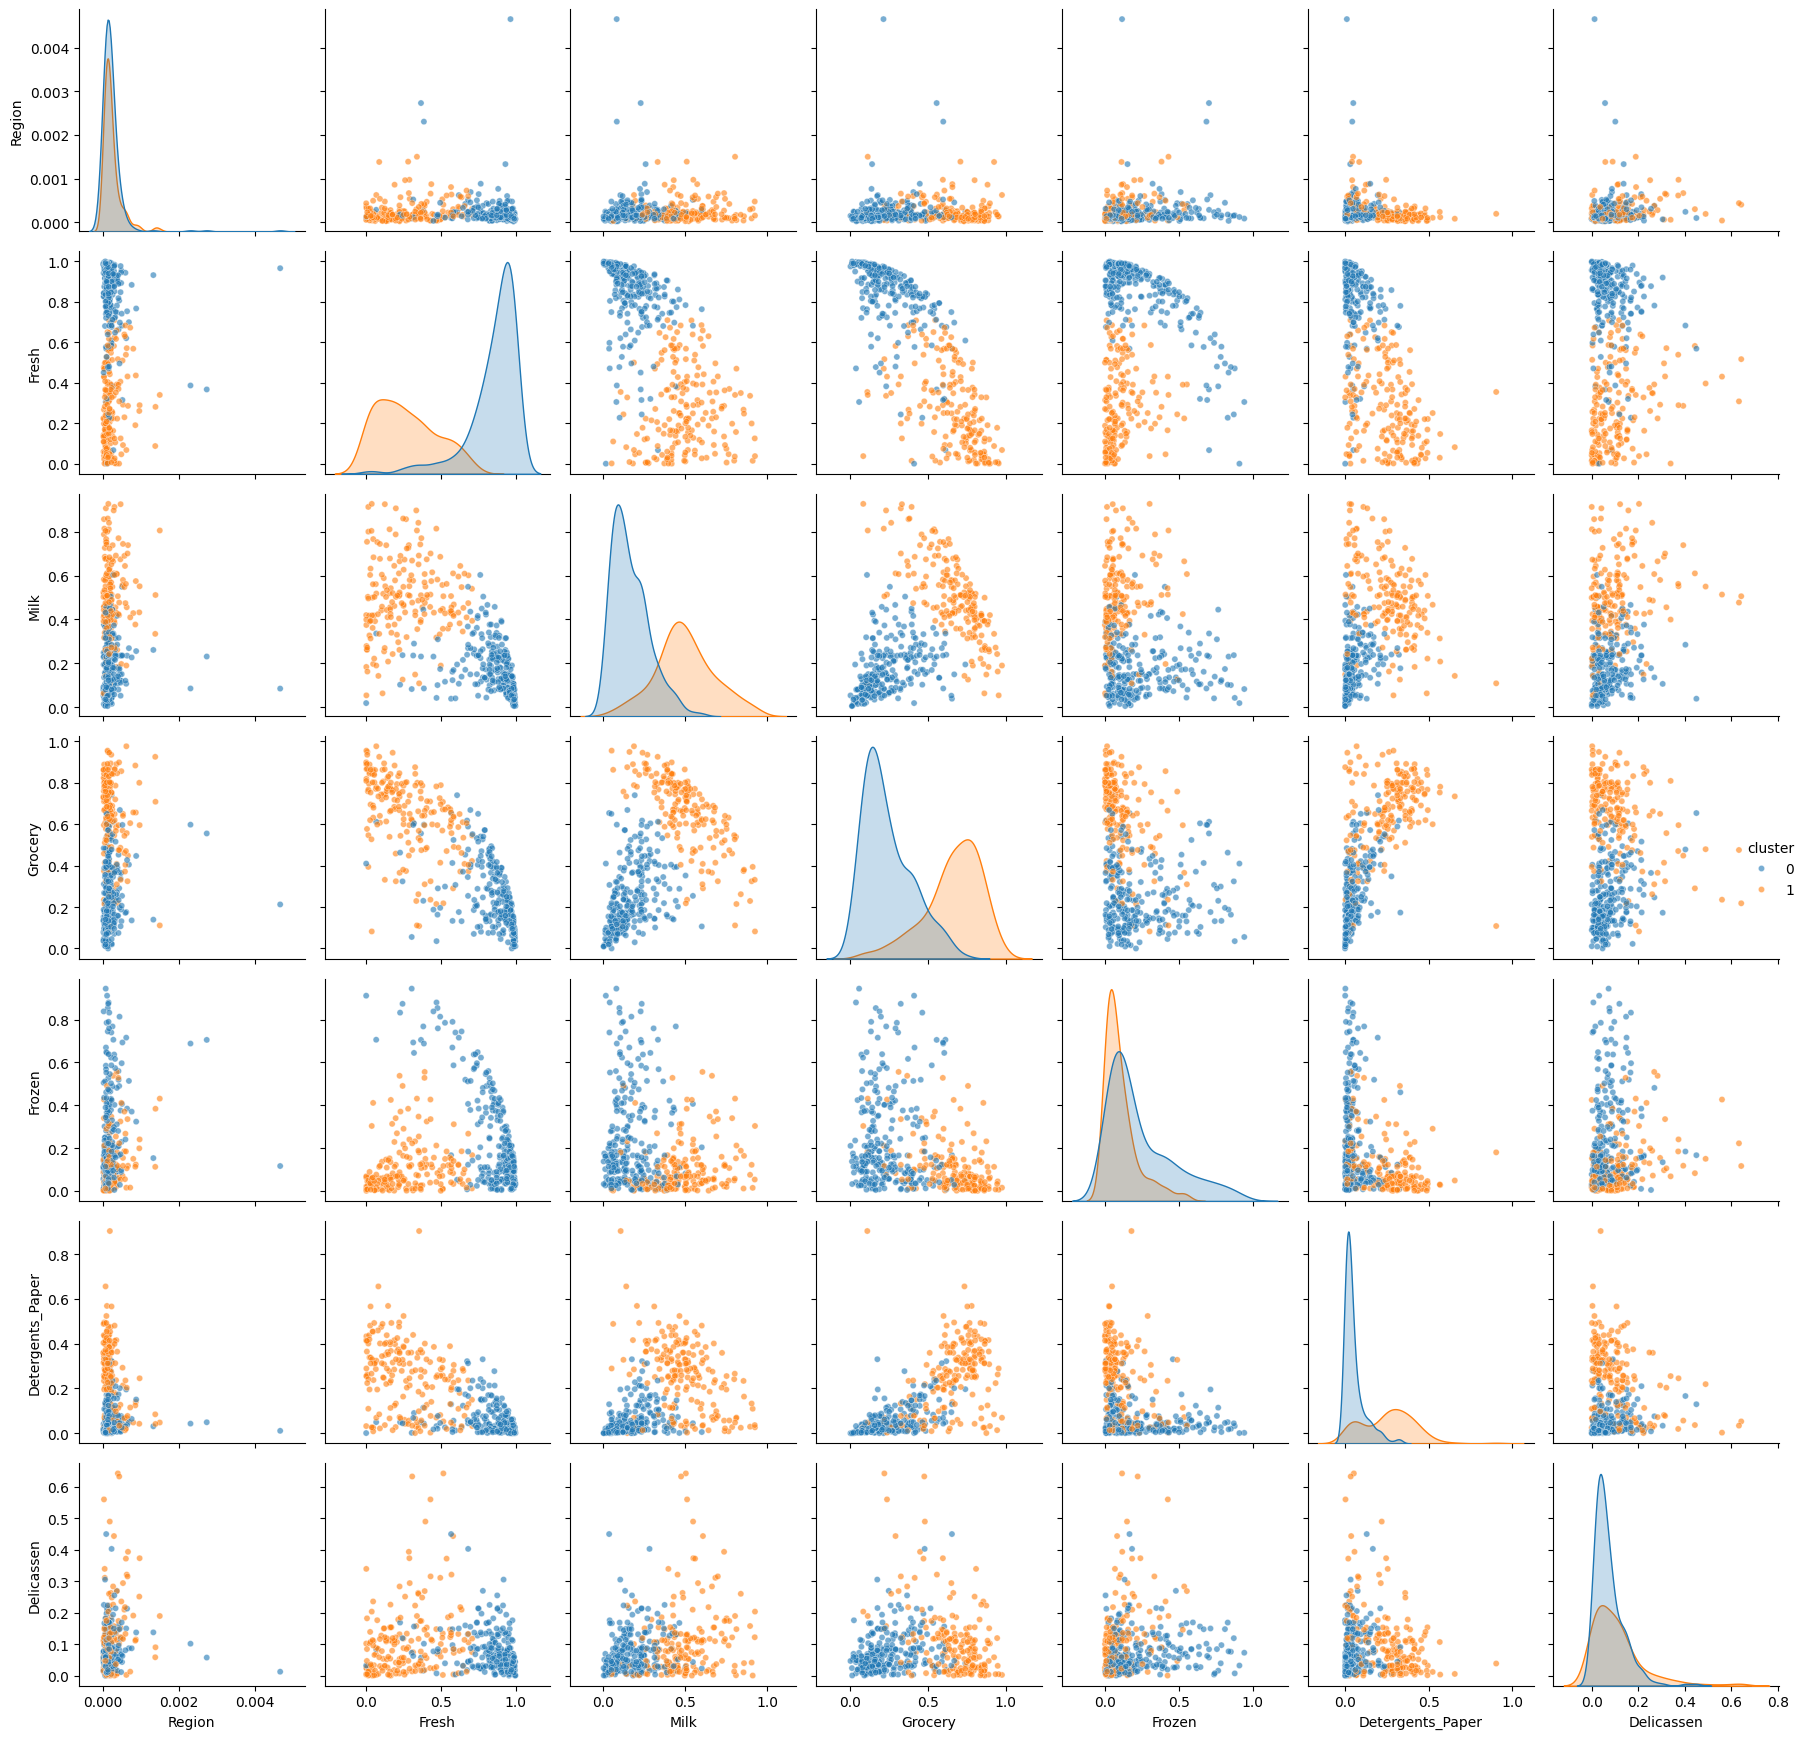

In [ ]:
# hecho por gpt es el que mejor se ve pero es lento
df = data_scaled[columns].copy()
df['cluster'] = cluster.labels_

# pairplot construye la matriz de scatter + diagonal
sns.pairplot(
    df,
    vars=columns,
    hue='cluster',
    diag_kind='kde',       # tipo de gráfico en la diagonal
    plot_kws={'alpha': 0.6, 's': 20}  # transparencias y tamaño de puntos
)
plt.tight_layout()
plt.show()


(200, 2)


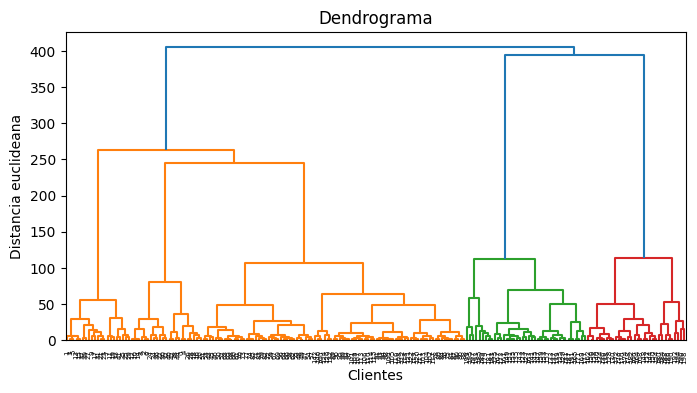

In [89]:
# Dataset
dataset = pd.read_csv('../dataSets/Mall_Customers.csv')
# dataset.head()
X = dataset.iloc[:,[3,4]].values
print(X.shape)

plt.figure(figsize=(8,4))
dendograma = shc.dendrogram(shc.linkage(X,method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia euclideana')
plt.show()


In [101]:
# Con 3 grupos, siguiendo la recomendación del dendrograma
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

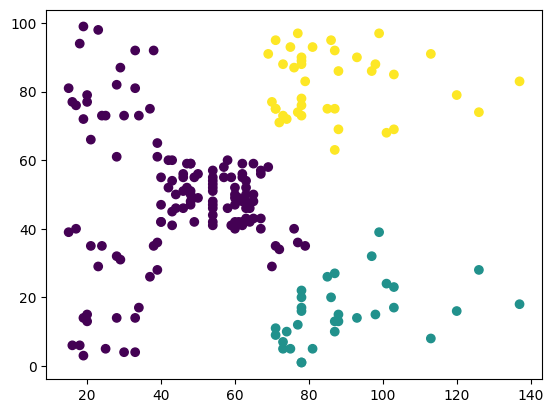

In [102]:
plt.scatter(X[:,0],X[:,1],c=y_hc)

In [111]:
hc = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

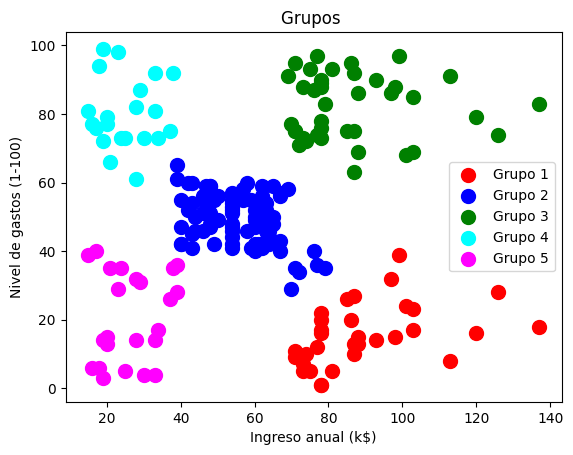

In [112]:
# Graficando los resultados
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label='Grupo 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label='Grupo 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label='Grupo 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label='Grupo 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label='Grupo 5')
plt.title('Grupos ')
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Nivel de gastos (1-100)')
plt.legend()
plt.show()